In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline
!pip install pandas-datareader
import pandas_datareader as pdr

In [38]:
assets= yf.download(['PG','^GSPC'], period='13Y')['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [19]:
asset=pd.DataFrame(assets)
asset

,PG,^GSPC
Date,,
2010-04-15 00:00:00-04:00,42.752728,1211.670044
2010-04-16 00:00:00-04:00,42.650925,1192.130005
2010-04-19 00:00:00-04:00,42.902016,1197.520020
2010-04-20 00:00:00-04:00,42.881645,1207.170044
2010-04-21 00:00:00-04:00,43.180248,1205.939941
...,...,...
2023-04-10 00:00:00-04:00,150.960007,4109.109863
2023-04-11 00:00:00-04:00,150.660004,4108.939941
2023-04-12 00:00:00-04:00,151.070007,4091.949951


In [39]:
assets.head()

,PG,^GSPC
Date,,
2010-04-15 00:00:00-04:00,42.752708,1211.670044
2010-04-16 00:00:00-04:00,42.650921,1192.130005
2010-04-19 00:00:00-04:00,42.902008,1197.520020
2010-04-20 00:00:00-04:00,42.881649,1207.170044
2010-04-21 00:00:00-04:00,43.180237,1205.939941


In [40]:
assets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3273 entries, 2010-04-15 00:00:00-04:00 to 2023-04-14 00:00:00-04:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      3273 non-null   float64
 1   ^GSPC   3273 non-null   float64
dtypes: float64(2)
memory usage: 76.7 KB


<AxesSubplot:xlabel='Date'>

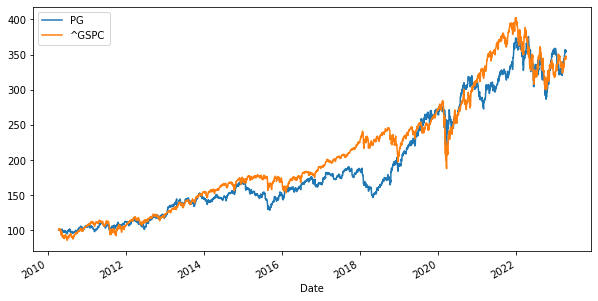

In [41]:
(assets/assets.iloc[1]*100).plot(figsize=(10,5))

In [42]:
log_returns= np.log(assets/assets.shift(1))

In [43]:
log_returns.mean()*250

PG       0.096413
^GSPC    0.093836
dtype: float64

In [44]:
log_returns.cov()*250

,PG,^GSPC
PG,0.030205,0.017713
^GSPC,0.017713,0.031815


In [45]:
log_returns.corr()

,PG,^GSPC
PG,1.00000,0.57141
^GSPC,0.57141,1.00000


In [46]:
num_assets=2

In [47]:
num_assets

2

In [53]:
arr=np.random.random(2)
arr

array([0.99310205, 0.74461773])

In [52]:
arr[0]+arr[1]

1.1469801917893778

In [56]:
w=np.random.random(num_assets)
w /= np.sum(w)
w
#this allows u to generate weight that equal 1

array([0.30121481, 0.69878519])

In [57]:
w[0]+w[1]

1.0

expected portfolio return

In [58]:
np.sum(w*log_returns.mean()*250)

0.09461211429008597

expected portfolio variance

In [60]:
np.dot(w.T,np.dot(log_returns.cov()*250,w))

0.02573233792750696

expected portfolio volatility

In [61]:
np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*250,w)))

0.16041302293612872

In [62]:
pfolio_returns=[]
pfolio_volatility=[]

for x in range (1000):
    w=np.random.random(num_assets)
    w/=np.sum(w)
    pfolio_returns.append(np.sum(w*log_returns.mean()*250))
    pfolio_volatility.append(np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*250,w))))

pfolio_returns,pfolio_volatility

([0.09503109890604922,
  0.0950941691167507,
  0.09479482368958539,
  0.09547884024371009,
  0.09503194850236063,
  0.09514622255361019,
  0.09513297733951248,
  0.09399548828303646,
  0.09569261177524847,
  0.09503876487292115,
  0.09603058722752766,
  0.09492580748032262,
  0.09633732437850091,
  0.09564014494594833,
  0.09462598471834185,
  0.09558262580058514,
  0.09577481439973679,
  0.09605730987296893,
  0.093951716397394,
  0.09487652677987218,
  0.09478126584368468,
  0.09476875495012355,
  0.0958632968059725,
  0.09567675889837822,
  0.09574224291772283,
  0.09511726519743557,
  0.09628787910146444,
  0.09615790511011967,
  0.09536650080153894,
  0.09491774995341865,
  0.09528761887537648,
  0.0962219566636119,
  0.09470595374284876,
  0.09507519644506263,
  0.09436674220133326,
  0.09405219309466106,
  0.09451467354656919,
  0.09606052341328528,
  0.09560189178148051,
  0.0954893677433715,
  0.09493788585747595,
  0.09466049849839736,
  0.09504955667479947,
  0.0951283364356

In [63]:
pfolio_returns=[]
pfolio_volatility=[]

for x in range (1000):
    w=np.random.random(num_assets)
    w/=np.sum(w)
    pfolio_returns.append(np.sum(w*log_returns.mean()*250))
    pfolio_volatility.append(np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*250,w))))

pfolio_returns=np.array(pfolio_returns)
pfolio_volatility=np.array(pfolio_volatility)

pfolio_returns,pfolio_volatility

(array([0.09431176, 0.0957006 , 0.09471862, 0.09487188, 0.09431393,
        0.09516307, 0.09624663, 0.09582001, 0.09548424, 0.09582776,
        0.09479214, 0.09474545, 0.09554802, 0.09572479, 0.09612598,
        0.09558526, 0.09503946, 0.09501126, 0.09546831, 0.09472542,
        0.09515814, 0.09526864, 0.09388629, 0.09627805, 0.09466349,
        0.09621856, 0.09640976, 0.09576709, 0.09423278, 0.09402443,
        0.09519944, 0.0946801 , 0.09636253, 0.09559473, 0.09488612,
        0.09466259, 0.09449385, 0.09527244, 0.09397895, 0.09556053,
        0.09399975, 0.09549615, 0.0946182 , 0.09518953, 0.0942684 ,
        0.09597454, 0.09487304, 0.09478737, 0.09439567, 0.09388895,
        0.09493353, 0.09458071, 0.0959635 , 0.09403544, 0.09445436,
        0.09540061, 0.09427959, 0.09442533, 0.09559761, 0.09532559,
        0.09470588, 0.09517625, 0.09531012, 0.09535188, 0.09510844,
        0.09489306, 0.09453725, 0.09580852, 0.09567106, 0.09478779,
        0.09609668, 0.0944003 , 0.09510544, 0.09

In [64]:
portfolios= pd.DataFrame({'Return':pfolio_returns,'Volatility':pfolio_volatility})

In [65]:
portfolios.head()

,Return,Volatility
0,0.094312,0.165873
1,0.095701,0.159160
2,0.094719,0.158979
3,0.094872,0.157399
4,0.094314,0.165826


In [66]:
portfolios.tail()

,Return,Volatility
995,0.095522,0.157309
996,0.094923,0.157004
997,0.093993,0.173781
998,0.095505,0.157177
999,0.094338,0.165313


Text(0, 0.5, 'expected return')

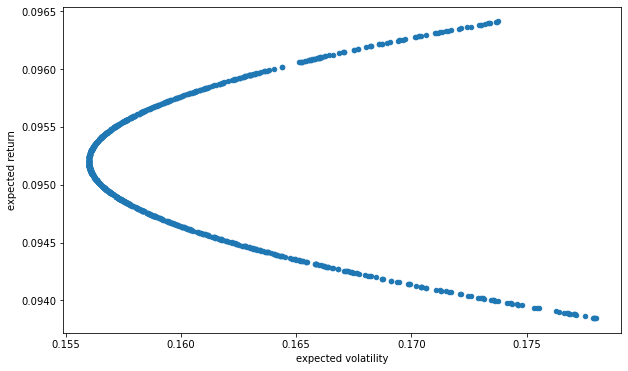

In [67]:
portfolios.plot(y='Return',x='Volatility',kind='scatter',figsize=(10,6));
plt.xlabel('expected volatility')
plt.ylabel('expected return')

In [68]:
type(assets)

pandas.core.frame.DataFrame